In [48]:
import scipy.io as sio
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
#Loading Data
data = sio.loadmat('ex5/ex5data1.mat')
Xtrain, Ytrain = data['X'], data['y'][:, 0]
Xtest, Ytest = data['Xtest'], data['ytest'][:, 0]
Xval, Yval = data['Xval'], data['yval'][:, 0]
Xval.shape[0]

21

In [4]:
x_train = np.append(np.ones((Xtrain.shape[0], 1)), Xtrain, axis=1)
x_val = np.append(np.ones((Xval.shape[0], 1)), Xval, axis=1)
x_test = np.append(np.ones((Xtest.shape[0], 1)), Xtest, axis=1)
y_train = Ytrain.reshape(-1,1)
y_val = Yval.reshape(-1,1)
y_test = Ytest.reshape(-1,1)

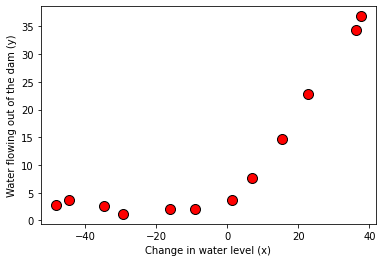

In [140]:
# Visualizing Data
pyplot.plot(Xtrain, Ytrain, 'ro', ms=10, mec='k', mew=1)
pyplot.xlabel('Change in water level (x)')
pyplot.ylabel('Water flowing out of the dam (y)');

In [6]:
# Linear Regression
class LinearRegression:

    def predict(self, features, weights):
        return np.dot(features, weights)

    def compute_cost(self, features, labels, weights):
        predictions = self.predict(features, weights)
        M = labels.shape[0]
        return np.sum(np.square(predictions - labels)) / (2 * M)

    def update_weights(self, weights, features, labels, lr):
        predictions = self.predict(features, weights)
        gradient = np.matmul(features.transpose(), predictions - labels)
        M = labels.shape[0]
        weights = weights - (lr / M) * gradient
        return weights

    def train(self, features, labels, weights, lr, iterations):
        costs_history = []
        for i in range(iterations):
            weights = self.update_weights(weights, features, labels, lr)
            cost = self.compute_cost(features, labels, weights)
            costs_history.append((i, cost))
        return weights, costs_history

    def train_normal_equation(self, features, labels):
        return np.dot(inv(np.matmul(features.transpose(), features)), np.matmul(features.transpose(), labels))

    def update_weights_reg(self, weights, features, labels, lr, lam):
        predictions = self.predict(features, weights)
        M = labels.shape[0]
        gradient = (1 / M) * np.dot(features.transpose(), predictions - labels)
        regularization = np.append([1], np.full((weights.shape[0] - 1, 1), 1 - ((lr * lam) / M))).reshape(-1, 1)
        weights = np.multiply(weights, regularization) - (lr * gradient)
        return weights

    def train_reg(self, features, labels, weights, lr, lam, iter):
        cost_history = []
        for i in range(iter):
            weights = self.update_weights_reg(weights, features, labels, lr, lam)
            cost_history.append((i, self.compute_cost(features, labels, weights)))
        return weights, cost_history

In [141]:
# Training, val, test data for simple regression
x_train = np.append(np.ones((Xtrain.shape[0], 1)), Xtrain, axis=1)
x_val = np.append(np.ones((Xval.shape[0], 1)), Xval, axis=1)
x_test = np.append(np.ones((Xtest.shape[0], 1)), Xtest, axis=1)
y_train = Ytrain.reshape(-1,1)
y_val = Yval.reshape(-1,1)
y_test = Ytest.reshape(-1,1)

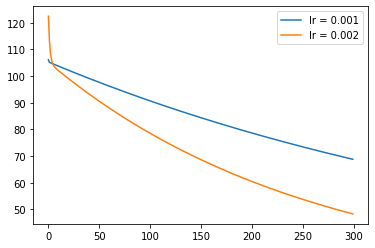

In [142]:
# Choosing learning rates
linear_regression = LinearRegression()
weights = np.zeros((x_train.shape[1], 1))
weights, cost_history = linear_regression.train_reg(x_train,y_train, weights,0.001,0,300)
plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = "lr = 0.001")
weights = np.zeros((x_train.shape[1], 1))
weights, cost_history = linear_regression.train_reg(x_train,y_train, weights,0.002,0,300)
plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = "lr = 0.002")
# weights = np.zeros((x_train.shape[1], 1))
# weights, cost_history = linear_regression.train_reg(x_train,y_train, weights,0.003,0,300)
# plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = "lr = 0.003")
plt.legend()

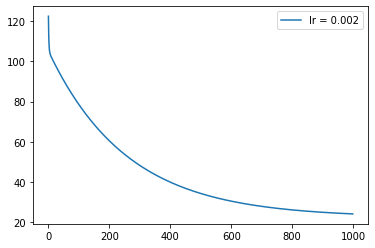

In [145]:
#Choosen lr = 0.002
weights = np.zeros((x_train.shape[1], 1))
weights, cost_history = linear_regression.train_reg(x_train,y_train, weights,0.002,0,1000)
plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = "lr = 0.002")
plt.legend()

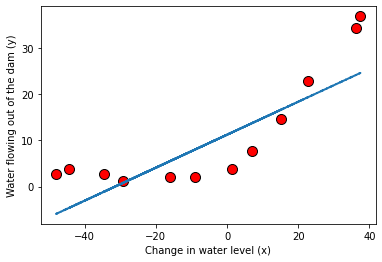

In [146]:
# Visuling the linear hypothesis
pyplot.plot(Xtrain, Ytrain, 'ro', ms=10, mec='k', mew=1)
pyplot.xlabel('Change in water level (x)')
pyplot.ylabel('Water flowing out of the dam (y)');
pyplot.plot(Xtrain, np.dot(x_train, weights), '--', lw=2);

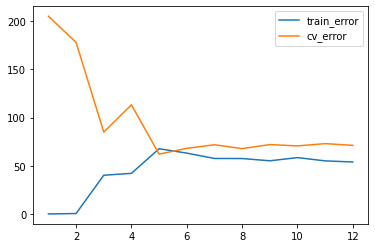

In [148]:
# plotting Learning Curves Both train_error and cv error are high indicating high bias
train_error_list =[]
cv_error_list = []
for i in range(len(x_train)):
    features = x_train[0:i+1]
    labels = y_train[0:i+1]
    weights = np.zeros((features.shape[1], 1))
    weights, cost = linear_regression.train_reg(features,labels, weights,0.0005,0,1000)
    train_error_list.append((i+1,linear_regression.compute_cost(features, labels, weights)))
    cv_error_list.append((i+1,linear_regression.compute_cost(x_val,y_val,weights)))
plt.plot([train_error_list[i][0] for i in range(len(train_error_list))], [train_error_list[i][1] for i in range(len(train_error_list))], label ="train_error")
plt.plot([cv_error_list[i][0] for i in range(len(cv_error_list))], [cv_error_list[i][1] for i in range(len(cv_error_list))], label= "cv_error")
plt.legend()
plt.show()
    

In [149]:
## Function to create additional polynomial features
def create_poly_feature(num,d):
    poly=[]
    for i in range(1,d+1):
        poly.append(pow(num,i))
    return poly

In [154]:
## Creating additional features
xpoly_train = np.column_stack(create_poly_feature(Xtrain,8))
xpoly_val = np.column_stack(create_poly_feature(Xval,8))
xpoly_test = np.column_stack(create_poly_feature(Xtest,8))

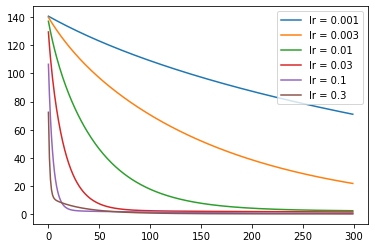

In [206]:
## Choosing learning rate
std_scale = preprocessing.StandardScaler().fit(xpoly_train)
xpoly_train_std = np.append(np.ones((y_train.shape[0], 1)), std_scale.transform(xpoly_train), axis=1)
weights = np.zeros((xpoly_train_std.shape[1], 1))
weights, cost_history = linear_regression.train_reg(xpoly_train_std,y_train, weights,0.001,0,300)
plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = "lr = 0.001")
weights = np.zeros((xpoly_train_std.shape[1], 1))
weights, cost_history = linear_regression.train_reg(xpoly_train_std,y_train, weights,0.003,0,300)
plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = "lr = 0.003")
weights = np.zeros((xpoly_train_std.shape[1], 1))
weights, cost_history = linear_regression.train_reg(xpoly_train_std,y_train, weights,0.01,0,300)
plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = "lr = 0.01")
weights = np.zeros((xpoly_train_std.shape[1], 1))
weights, cost_history = linear_regression.train_reg(xpoly_train_std,y_train, weights,0.03,0,300)
plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = "lr = 0.03")
weights = np.zeros((xpoly_train_std.shape[1], 1))
weights, cost_history = linear_regression.train_reg(xpoly_train_std,y_train, weights,0.1,0,300)
plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = "lr = 0.1")
weights = np.zeros((xpoly_train_std.shape[1], 1))
weights, cost_history = linear_regression.train_reg(xpoly_train_std,y_train, weights,0.3,0,300)
plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = "lr = 0.3")
# weights, cost_history = linear_regression.train_reg(xpoly_train_std,y_train, weights,1,0,300)
# plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = "lr = 0.3")
plt.legend()


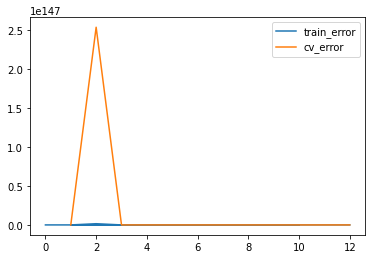

[(0, 0.7320525876912972), (0.0001, 0.7321698795602701), (0.001, 0.7332259752422564), (0.003, 0.7355758570686718), (0.01, 0.7438323833028289), (0.03, 0.76767988116277), (0.1, 0.853579764600577), (1, 1.988501021363006), (3, 4.525203001742526), (10, 14.8257805416154), (1, 9.860761315262648e-32), (2, 1.5503905658435913e+145), (3, 2.179833754444689e+73), (4, 7.292307418455389e+100), (5, 0.0031627129863094757), (6, 0.03143092393392991), (7, 0.0965207460669109), (8, 0.09225196972780406), (9, 0.3037293308888925), (10, 0.29295339006354715), (11, 0.2818462039679895), (12, 0.3042142891855907)]
[(1, 138.84677697582424), (2, 2.5401235007130938e+147), (3, 7.743736341904909e+73), (4, 1.6674273237906e+101), (5, 8.589290825056173), (6, 10.266067999042342), (7, 5.291326383220695), (8, 5.21820972418515), (9, 6.358577812721033), (10, 5.969852324784905), (11, 5.838796730352935), (12, 12.897871120929866)]


In [207]:
# Choose learning rate 0.3 train_error_list =[] Both cv and train error are less but still significant difference between CV and train error indicating high variance
cv_error_list = []
for i in range(len(x_train)):
    features = xpoly_train[0:i+1]
    labels = y_train[0:i+1]
    std_scale = preprocessing.StandardScaler().fit(features)
    features_std = np.append(np.ones((labels.shape[0], 1)), std_scale.transform(features), axis=1)
    xpoly_val_std = np.append(np.ones((y_val.shape[0], 1)), std_scale.transform(xpoly_val), axis=1)
    weights = np.zeros((features_std.shape[1], 1))
    weights, cost = linear_regression.train_reg(features_std,labels, weights,0.3,0,500)
    train_error_list.append((i+1,linear_regression.compute_cost(features_std, labels, weights)))
    cv_error_list.append((i+1,linear_regression.compute_cost(xpoly_val_std,y_val,weights)))
plt.plot([train_error_list[i][0] for i in range(len(train_error_list))], [train_error_list[i][1] for i in range(len(train_error_list))], label ="train_error")
plt.plot([cv_error_list[i][0] for i in range(len(cv_error_list))], [cv_error_list[i][1] for i in range(len(cv_error_list))], label= "cv_error")
plt.legend()
plt.show()
print(train_error_list)
print(cv_error_list)

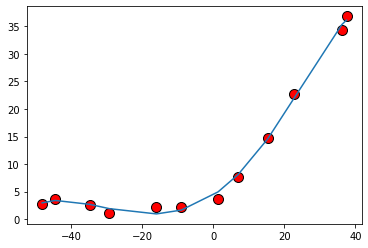

In [209]:
#Visualizng curve high variance
std_scale = preprocessing.StandardScaler().fit(xpoly_train)
xpoly_train_std = np.append(np.ones((y_train.shape[0], 1)), std_scale.transform(xpoly_train), axis=1)
weights = np.zeros((xpoly_train_std.shape[1], 1))
weights, cost_history = linear_regression.train_reg(xpoly_train_std,y_train, weights,0.3,0,1000)
pyplot.plot(Xtrain, Ytrain, 'ro', ms=10, mec='k', mew=1)
predictions = [linear_regression.predict(xpoly_train_std[i], weights) for i in range(len(Xtrain))]
xs, ys= zip(*sorted(zip(Xtrain, predictions)))
plt.plot(xs,ys)
plt.show()

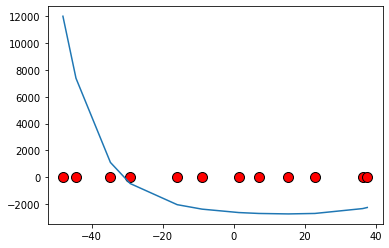

In [217]:
#reducing high variance with lam = 1, lr =0.3 high learing rate
std_scale = preprocessing.StandardScaler().fit(xpoly_train)
xpoly_train_std = np.append(np.ones((y_train.shape[0], 1)), std_scale.transform(xpoly_train), axis=1)
weights = np.zeros((xpoly_train_std.shape[1], 1))
weights, cost_history = linear_regression.train_reg(xpoly_train_std,y_train, weights,0.3,1,1000)
pyplot.plot(Xtrain, Ytrain, 'ro', ms=10, mec='k', mew=1)
predictions = [linear_regression.predict(xpoly_train_std[i], weights) for i in range(len(Xtrain))]
xs, ys= zip(*sorted(zip(Xtrain, predictions)))
plt.plot(xs,ys)
plt.show()

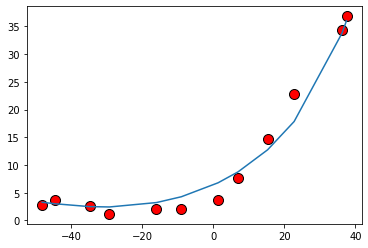

In [218]:
#reducing high variance with lam = 1, lr =0.03
std_scale = preprocessing.StandardScaler().fit(xpoly_train)
xpoly_train_std = np.append(np.ones((y_train.shape[0], 1)), std_scale.transform(xpoly_train), axis=1)
weights = np.zeros((xpoly_train_std.shape[1], 1))
weights, cost_history = linear_regression.train_reg(xpoly_train_std,y_train, weights,0.03,1,1000)
pyplot.plot(Xtrain, Ytrain, 'ro', ms=10, mec='k', mew=1)
predictions = [linear_regression.predict(xpoly_train_std[i], weights) for i in range(len(Xtrain))]
xs, ys= zip(*sorted(zip(Xtrain, predictions)))
plt.plot(xs,ys)
plt.show()

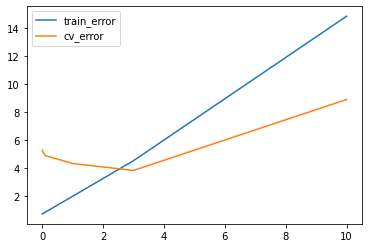

In [224]:
# Choosing lambda from cv_error comparision with fixed lr = 0.03
std_scale = preprocessing.StandardScaler().fit(xpoly_train)
xpoly_train_std = np.append(np.ones((y_train.shape[0], 1)), std_scale.transform(xpoly_train), axis=1)
xpoly_val_std = np.append(np.ones((y_val.shape[0], 1)), std_scale.transform(xpoly_val), axis=1)
train_error_list = []
cv_error_list = []
for i in [0,0.0001,0.001,0.003, 0.01,0.03,0.1,1,3,10]:
    weights = np.zeros((xpoly_train_std.shape[1], 1))
    weights, cost_history = linear_regression.train_reg(xpoly_train_std,y_train, weights,0.03,i,1000)
    train_error_list.append((i,linear_regression.compute_cost(xpoly_train_std,y_train, weights)))
    cv_error_list.append((i,linear_regression.compute_cost(xpoly_val_std,y_val, weights)))
plt.plot([train_error_list[i][0] for i in range(len(train_error_list))],[train_error_list[i][1] for i in range(len(train_error_list))], label ="train_error")
plt.plot([cv_error_list[i][0] for i in range(len(cv_error_list))], [cv_error_list[i][1] for i in range(len(cv_error_list))], label= "cv_error")
plt.legend()
plt.show()

In [225]:
cv_error_list, train_error

([(0, 5.27131819290228),
  (0.0001, 5.270842365028134),
  (0.001, 5.266569960669683),
  (0.003, 5.257140199161918),
  (0.01, 5.224826598490619),
  (0.03, 5.138184186639371),
  (0.1, 4.892822091265833),
  (1, 4.324975749266798),
  (3, 3.8323363316240644),
  (10, 8.889698828656487)],
 4.525171148596559)

In [215]:
#choosing lam=3
std_scale = preprocessing.StandardScaler().fit(xpoly_train)
xpoly_train_std = np.append(np.ones((y_train.shape[0], 1)), std_scale.transform(xpoly_train), axis=1)
weights, cost_history = linear_regression.train_reg(xpoly_train_std,y_train, weights,0.03,3,1000)
xpoly_val_std = np.append(np.ones((y_val.shape[0], 1)), std_scale.transform(xpoly_val), axis=1)
xpoly_test_std = np.append(np.ones((y_test.shape[0], 1)), std_scale.transform(xpoly_test), axis=1)
train_error = linear_regression.compute_cost(xpoly_train_std,y_train, weights)
cv_error = linear_regression.compute_cost(xpoly_val_std,y_val, weights)
test_error = linear_regression.compute_cost(xpoly_test_std,y_test, weights)

In [226]:
#Reporting errors
print("train_error = ", train_error)
print("cv_error = ", cv_error)
print("test_error = ", test_error)

train_error =  4.525171148596559
cv_error =  3.832284466357127
test_error =  3.571939306042034
